# Processus et calcul stochastique pour la biologie

Groupe : Bastien Chassagnol, Pauline Bazelle, Adrien Stadler

## Introduction

Le modèle Fitzhugh-Nagumo (FHN) est décrit par un système de deux
équations différentielles : 

\begin{align}
   & \epsilon\frac{dv}{dt}= v(v − a)(1 − v) − w + \zeta(t)\\
   &\frac{dw}{dt}= v − dw − [b + r sin(\beta)]
\end{align}


La variable $v$ représente la tension et $w$ est une variable de recovery. Le bruit $\varepsilon(t)$ est un bruit d’Ornstein-Uhlenbeck et répond à l'équation stochastique différentielle suivante : 
$$
    \frac{d \zeta}{dt} = −\lambda\zeta(t) + \lambda W(t)
$$
où W (t) est un bruit blanc gaussien avec moyenne $<W (t)>= 0$ et une autocorrélation égale à \\
$<W(s)W (t)>= 2D\delta(t - s)$. Le paramètre $\lambda$ est mis à l’échelle en fonction du temps de corrélation $\tau c$ : $\lambda = \frac{1}{\tau c}$.

Voici les valeurs des paramètres qui vont être utilisées : 

|Paramètres | Valeurs               |
|:------:   |:------:               |
|$\beta$    | 15                    |
|a          | 0.5                   |
|b          | 0.15                  |
|d          | 1                     |
|$\epsilon$ | 0.005                 |
|D          | $10^{-5}$ : à modifier|
|$\tau_c$   | 0.001                 |
|r          | 0 : à modifier        |

## Exercice 1 : Fonction d'autocorrélation du bruit $\eta(t)$

L'équation différentielle décrivant le bruit dans notre système est ainsi décrite dans l'article: 
$$
    \frac{d \eta}{dt} = −\lambda\eta(t) + \lambda \zeta(t) \Leftrightarrow d\eta= −\lambda\eta(t)dt + \lambda \zeta(t)dt
$$
dans laquelle on peut reconnaître l'équivalent d'un bruit blanc gaussien avec la variable $ \zeta$ et notre processus d'Ornstein, décrit par la variable $ \eta$. En effet, on peut associer cette équation au processus d'OU, en posant (cf modèle du cours) que $ \theta=\sigma=\lambda$ et que la déviance moyenne $ \mu$ est nulle. Pour résoudre cette équation, on peut utiliser la méthode \textbf{des variations de paramètres}. Pour cela, on calcule la dérivée de $ d(\eta_t e^{\lambda t})$, ce qui nous donne:
\begin{eqnarray*}
d(\eta_t e^{\lambda t}) &=&(d\eta_t)e^{\lambda t}dt+\eta_t \lambda e^{\lambda t} dt\\
&=& dt e^{\lambda t}( −\lambda\eta(t) + \lambda \zeta(t) ) +\eta_t \lambda e^{\lambda t} dt \\
&=&  dt e^{\lambda t} \lambda \zeta(t)
\end{eqnarray*}

On intègre ensuite cette expression de 0 à $t$, ce qui nous donne le système suivant: $$\frac{d(\eta_t e^{\lambda t})}{dt}= e^{\lambda t} \lambda \zeta(t) \Leftrightarrow \eta_t e^{\lambda t} - \eta_{0} =\int_0^{t} e^{\lambda s} \lambda \zeta(s) ds $$ $$
\Leftrightarrow  \eta_t =\eta_{0} e^{-\lambda t} +  \lambda \int_0^{t} e^{\lambda (s-t)} \zeta(s)ds $$

On va ensuite calculer l'espérance du processus de l'article:
$$
\begin{eqnarray*}
<\eta_t >&=& E(\eta_t )\\
&=& E(\eta_{0} e^{-\lambda t} +  \lambda \int_0^{t} e^{\lambda (s-t)} \zeta(s)ds )\\
&=& e^{-\lambda t}  E(\eta_{0})  + \lambda \times 0\\
&=&e^{-\lambda t}  E(\eta_{0})
\end{eqnarray*}
$$
De plus, d'après l'article, cette espérance est nulle, notamment puisqu'on souhaite éviter de dévier de la moyenne du signal neuronal recherchée, ce qui implique que $ E(\eta_0)=0$. Pour les autres simplifications, on s'est notamment servi des propriétés de linéarité de l'espérance, et de la propriété de l'intégrale \textbf{stochastique} d'Ito, qui stipule notamment que l'espérance d'une intégrale stochastique est constante et nulle. 

Nous allons désormais calculer l'auto-corrélation du processus d'OU, pour cela, nous allons prendre deux valeurs de temps différentes $t$ et $s$, avec $t$ plus grand que $s$, et calculer leur covariance:
$$
\begin{eqnarray*}
<<\eta_s \eta_t >> &=& <[\eta_s-<\eta_s>][\eta_t-<\eta_t>]>\\
&=& <\eta_s \eta_t >
\end{eqnarray*}
$$

En effet, les deux moyennes de ce procédé sont nulles dans notre cas, ce qui implique d'ailleurs que ce processus est \textbf{stationnaire} dans l'expérience réalisée dans l'article. C'est toujours le cas lorsque la moyenne est indépendante du temps, comme nous l'avons montré précédemment. Nous avons alors:
$$
\begin{eqnarray*}
<\eta_s \eta_t > &=& <\eta_{0} e^{-\lambda t} +  \lambda \int_0^{t} e^{\lambda (u-t)} \zeta(u)du, \eta_{0} e^{-\lambda s} +  \lambda \int_0^{s} e^{\lambda (v-s)} \zeta(v) dv   >\\
&=& \lambda^2 e^{-\lambda(t+s)}\int_0^{t} e^{\lambda u}\zeta(u)du \int_0^{s} e^{\lambda v} \zeta(v) dv\\
 &=& \lambda^2 e^{-\lambda(t+s)} \int_0^{s} e^{\lambda 2v} dv d<\zeta(v) \zeta(u)>\\
 &=& \frac{\lambda^2 e^{-\lambda(t+s)}2D}{2\lambda} \times (e^{\lambda2s}-1)\\ 
 &=& \lambda e^{-\lambda(t-s)}D -\lambda e^{-\lambda(t+s)}D \\
 &=& \lambda D (e^{-\lambda(t-s)} - e^{-\lambda(t+s)})
\end{eqnarray*}
$$
En remplaçant $ \lambda$ par le temps de corrélation du bruit $ \frac{1}{\tau_{c}}$ on retrouve quasiment l'expression donnée par l'article. Pour retrouver une expression identique, il faudrait aussi supposer qu'on néglige $ e^{-\lambda(t+s)}$, quantité que l'on peut effectivement supprimer, pour des valeurs suffisamment grandes de temps. En effet, on commence l'étude de notre article en supposant un temps de transition suffisamment long, tel que l'on puisse considérer être dans un état \textbf{stationnaire}. Quelques remarques importantes: on s'est servi de la propriété d'isomérie d'$ Ito$ appliquée à l'intégrale stochastique, et des propriétés de bilinéarité de la covariance. 

En considérant alors ces différentes hypothèses, nous avons l'expression suivante d'auto corrélation: 
$$ \frac{1}{\tau_c} D e^{-\frac{1}{\tau_c} (|t-s|)}$$
Quand $ t=s=t$ l' auto-corrélation est alors la variance du processus, ici indépendante du temps: 
$$ <<\eta_t \eta_t >> = \frac{1}{\tau_c} D e^{-\frac{1}{\tau_c}\times 0}= \frac{D}{\tau_c}$$

## Exercice 2 : Simulations numériques des solutions de (FHN)

On simule le processus stochastique correspondant aux équations de Fitzhug-Nagumo avec les paramètres suivants : $\beta=15$, $a=0.5$, $b=0.15$, $d=1.0$, $\epsilon =0.005$, $D=10^{-5}$, $\tau_c=0.01$, en utilisant le 4ème ordre de Runge-Kutta avec comme pas de temps $h=0.0025$. 

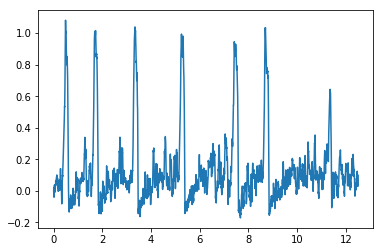

In [20]:
# Fitzhugh-Nagumo equations with noise
# 5BIM Stochastic Processes
# Longtin, A. (1993) Stochastic resonance in neuron model, 
# Journal of Statistical Physics 70:309-327 DOI:10.1007/BF01053970

from numpy import zeros, sqrt, sin, random, concatenate, diff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#fonction de resolution
def solve(r,D,n_etapes,beta=15,b=0.15):
    tau_c = 0.01
    lam = 1/tau_c
    epsilon = 0.005    
    a = 0.5    
    d = 1.0
    dt = 0.0025
    sqrt_dt = sqrt(dt)
    n = n_etapes
    v = zeros(n);
    w = zeros(n);
    xi= zeros(n);
    t = zeros(n);
    for i in range(n-1):
        v[i+1] = v[i] + dt*1/epsilon*( v[i]*(v[i]-a)*(1-v[i]) - w[i] + xi[i] ) 
        w[i+1] = w[i] + dt*( v[i] - d*w[i] - (b + r*sin(beta*t[i])) ) 
        xi[i+1]= xi[i] - dt*lam*xi[i] +sqrt_dt*lam*sqrt(2*D)*random.randn()
        t[i+1] = t[i] + dt
    return v, w, t, xi

#fonction de plot de v ou de w en fonction du temps
def plot_unique(t,v,w):
    plt.plot(t,v)
    #plt.plot(t,w)
    plt.show()
    return;

#simulations
[v,w,t,x]=solve(0,10**-5,5*10**3)
plt.plot(t,v)
#plt.show()

### Interprétations


## Exercice 3 : Calcul des ISI

In [21]:
def isi(t,x, theta):  
    indice_intervalle=np.where((x[0:-1]>theta) & (x[1:]<theta))
    s=t[indice_intervalle]     
    s=s[1:]-s[0:-1]
    return (s)

isi(t,v,0.5)

array([1.215 , 1.645 , 1.9175, 2.195 , 1.26  , 2.5575])

### Interprétations

## Exercice 4 : Histogramme des ISI

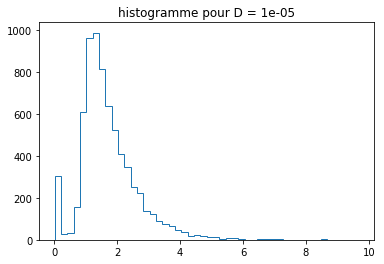

array([304.,  30.,  34., 156., 611., 961., 988., 817., 639., 524., 407.,
       349., 251., 222., 137., 124.,  92.,  76.,  66.,  49.,  37.,  18.,
        22.,  19.,  14.,  12.,   6.,  10.,   7.,   6.,   1.,   1.,   3.,
         4.,   5.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,
         1.,   0.,   0.,   1.])

In [22]:
def isih(theta,nb_simulations,r,D,nb_etapes,beta=15,b=0.15,plot_histo=True,windows_size=5):
    taille_intervalle=np.array([])
    for i in range(0,nb_simulations):        
        [v,w,t,x]=solve(r,D,nb_etapes,beta,b)
        #on conserve uniquement les valeurs pares 1000, les autres etant consideres comme transitoires
        temp_intervalle=isi(t[1000:],v[1000:],theta)        
        #on concatene nos différentes tailles d'intervalles
        taille_intervalle=np.hstack((taille_intervalle,temp_intervalle))
    
    categories_intervalle=plt.hist(taille_intervalle,bins=int(np.max(taille_intervalle)*5),histtype ="step")[0]   
    data_frame_intervalle = pd.DataFrame(data={'intervalle':categories_intervalle})    
    intervalle_lissee = data_frame_intervalle.rolling(windows_size, center=True, win_type="triang",min_periods=windows_size)
    intervalle_lissee = intervalle_lissee.mean()    
    #◘plt.plot( intervalle_lissee,"o")
    plt.title("histogramme pour D = "+str(D))
    plt.show()
    return(categories_intervalle)
    
theta=0.5
nb_simulations=100
isih(theta,nb_simulations,0,10**-5,5*10**4)

### Interprétations

## Exercice 5 : Simulations numériques des solutions de (FHN) périodiquement forcé et sans bruit

On réalise des simulations avec un FHN périodiquement forcé sans bruit. On pose alors, $D=0$.\\
Pour les petites valeurs de r, il ne devrait pas y avoir de pics.

(None, ' ', 1)
(None, ' ', 2)
(None, ' ', 3)
(None, ' ', 4)
(None, ' ', 5)
(None, ' ', 6)
(None, ' ', 7)
(None, ' ', 8)
(None, ' ', 9)
(None, ' ', 10)
(None, ' ', 11)
(None, ' ', 12)
(None, ' ', 13)
(None, ' ', 14)
(None, ' ', 15)
(None, ' ', 16)
(None, ' ', 17)
(None, ' ', 18)
(None, ' ', 19)
(None, ' ', 20)
(None, ' ', 21)
(None, ' ', 22)
(None, ' ', 23)
(None, ' ', 24)


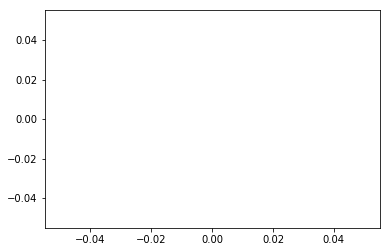

In [23]:
def determination_r_apparition_pic(valeur_seuil,beta):
    for i in range(10):
        r=0.1*i               
        [v,w,t,x]=solve(r,0,15,beta)        
        if (np.max(v)>valeur_seuil):
            #plt.plot(t,v)
            #plt.plot(t,w)
            plt.show()
            return(r)
            
#r_premier_pic=determination_r_apparition_pic(0.5,15)

#influence de beta sur l'appartion du premier pic
def influence_beta_pic(valeur_seuil):
    liste_r=[]
    for (val_beta) in range(1,25,1):
        valeur_r=determination_r_apparition_pic(valeur_seuil,val_beta)
        print(valeur_r," ",val_beta)
        liste_r.append(valeur_r)
    plt.plot(np.arange(1,25,1),liste_r)

influence_beta_pic(0.5)

### Interprétations

## Exercice 6 : Simulations numériques des solutions de (FHN) périodiquement forcé et avec bruit

On compute ISIH pour un modèle FHN périodiquement forcé et bruité pour $r=0.2$ à différentes intensités de bruit (pour $D=10^{-6}$, $D=3*10^{-6}$, $D=10^{-5}$, $D=2*10^{-5}$.

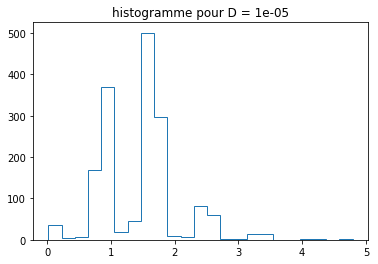

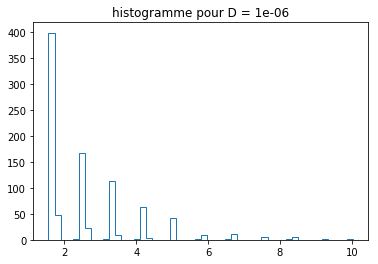

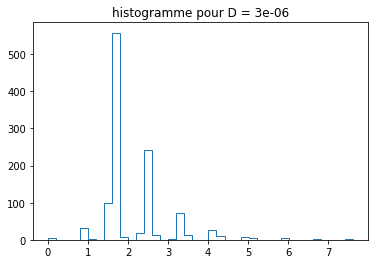

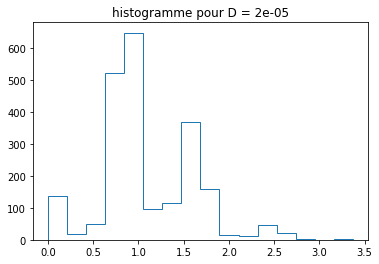

In [24]:
#forcing period de 0.84 correspond à un beta de 7.5

valeur_D=[10**(-5),10**(-6), 3*10**(-6), 2*10**(-5)]
for D in valeur_D:
    isih(theta=0.5,nb_simulations=20,r=0.2,nb_etapes=5*10**4,beta=7.5,b=0.12,D=D,windows_size=1)   

### Interprétations

Les faibles intensités de bruit ont plus de pics. On constate que lorsque l'intensité du bruit augmente, les probabilités se concentrent et sont plus élevées pour les premiers pics.

## Exercice 7 : Calcul du *return map*

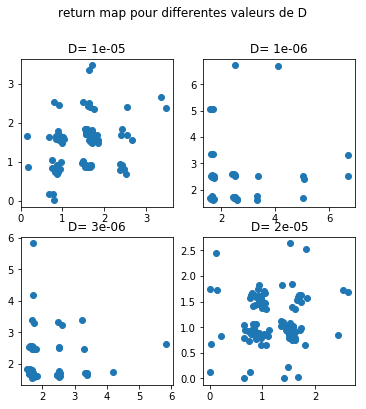

In [25]:
plt.figure(1, figsize=(6, 6))

for index,D in enumerate(valeur_D):
    [v,w,t,x]=solve(r=0.2,D=D,n_etapes=5*10**4,beta=7.5,b=0.12)
    temp_intervalle=isi(t[1000:],v[1000:],theta=0.5)     
    intervalle_passee=temp_intervalle[0:-1]
    intervalle_futur=temp_intervalle[1:]
    position_graphique=int(str(22)+str(index+1))    
    plt.subplot(position_graphique)
    plt.plot(intervalle_passee,intervalle_futur,"o")
    plt.title("D= "+str(D))
    
plt.suptitle("return map pour differentes valeurs de D",y=1.00)
plt.show()

### Interprétations

## Exercice 8 : Résonance stochastique

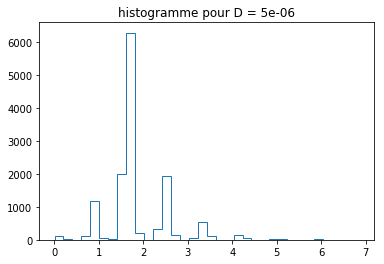

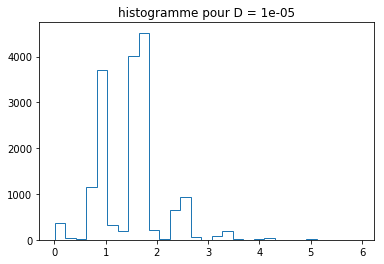

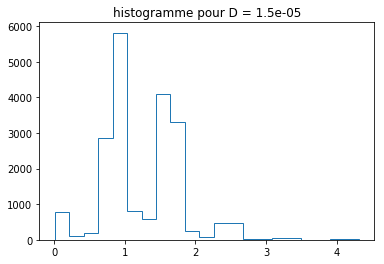

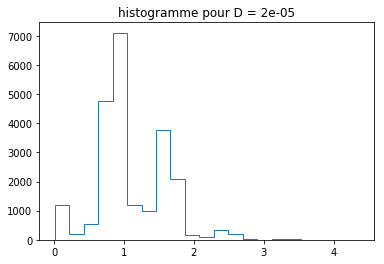

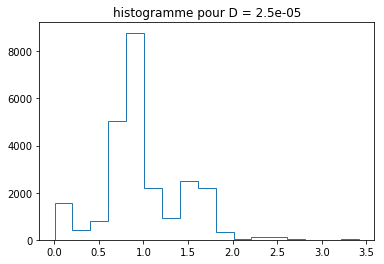

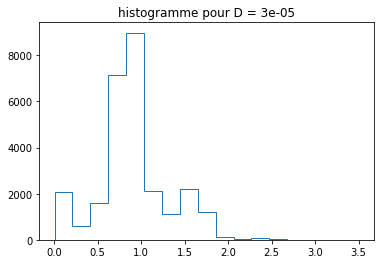

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 432x288 with 1 Axes>

In [26]:
#defintion des pics
pic1,pic2,pic3=np.array([]),np.array([]),np.array([])

for D in range(5,35,5):
    groupe_intervalle=isih(theta=0.5,nb_simulations=20,r=0.2,nb_etapes=5*10**5,beta=7.5,b=0.12,D=D*10**(-6),windows_size=1,plot_histo=False)
    #on recupere les pics, c'est à dire les points de temps superieurs à ceux qui les precedent et les suivent
    #on supprime le premier et le dernier indice, ne pouvant être pic relativement
    groupe_intervalle_modif=groupe_intervalle[1:-1]
    pics=groupe_intervalle_modif[np.where(groupe_intervalle[0:-2]<groupe_intervalle[1:-1]) and np.where(groupe_intervalle[1:-1]>groupe_intervalle[2:])]
    #on selectionne uniquement la hauteur des trois premiers pics
    pic1=np.hstack((pic1,pics[0]))
    pic2=np.hstack((pic2,pics[1]))
    pic3=np.hstack((pic3,pics[2]))

t=np.arange(5,35,5)
plt.plot(t,pic1,'ro',linestyle='--',label='peak 1')
plt.plot(t,pic2,'bs',linestyle="-",label="peak 2")
plt.plot(t,pic3,'g^',linestyle=":",label="peak 3")
plt.xlabel("D *10^-6")
plt.ylabel("nombre d'évenements")
plt.axis([5,35,-5,1000])
plt.title("Hauteur des pics en fonction du bruit ")
plt.legend(loc='upper center', bbox_to_anchor=(0.9, 1.00),ncol=1)
plt.show()

### Interprétations

## Conclusion